## Project 1: ##

**Members:**
*Mhariadora Bocalbos,*
*Renzhu Li,*
*Kunming Song*

# Introduction and Statement of the Problem: ###

**The Dataset:**
The dataset used for this project is a 20,000 row subset of the hflights package provided within the R programming language and came from the US Bureau of Transportation Statistics. The dataset contains information and metrics for commercial domestic (USA) airline flights that departed from 2 separate airports located in Houston, TX (IAH and HOU) for the calendar year 2011. The data has 21 attributes. These includes: Year, Month, DayofMonth (date of departure), DayOfWeek (integer equivalent of the days of the week), DepTime, ArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, AirTime, ArrDelay (in minutes), DepDelay (in minutes), Origin, Dest, Distance, TaxiIn (in minutes), TaxiOut (in minutes), Cancelled, CancellationCode, Diverted.

**Objective:**
Based on research and observation, it is evident that airports get majority of their revenue from the commercial airlines that use their "space" to fly passengers from one location to another. In this light, the overall objective of this data analysis is to find out which airport performs better in terms of two service quality metrics that airports use as part of their key performance indicators. Based on some data limitations, this analysis will only focus on two airports in Houston, Texas (IAH and HOU) and two performance indicators (Departure Delay and Average Taxi Time). Once researchers find out which airport performed worse on the two metrics, the next step is to find out which airline or carrier is causing the issue.

The results of this data analysis will help the airport know which metric they need to improve on and in addition to this, they will be able to identify which carrier they will need to focus with or communicate more in order to improve not just that airline's performance but the airport's performance as well. The researchers believe that this will benefit most, if not all, of the stakeholders in the air travel industry, like the airports, airlines, passengers, travel agencies, to name a few.

**Statement of the Problem:**
This data analysis aims to answer the following questions:
1. Which airport performed better/worse in terms of the average (in minutes) that aircrafts are able to leave their gates (Average gate departure delay)?
2. Which airport performed better/worse in terms of the average (in minutes) in taxi in and out times for each aircraft?
3. Based on the answers to questions 1 and 2 above, which among the airline/s caused the airport to perform worse than its competitor?

### Data Initialization: ###

In [1]:
import numpy as np
import pandas as pd

flights = pd.read_csv('https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv')
flights.head() #prints a sample of the dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


### Problem 1: ###
The following processes were undertaken to answer the problem above:
1. Created a subset of the data filtering only the flights with departure delay minutes > 0, this means that the flight's gate departure time was delayed. To ensure that we are also not getting flights that were cancelled in this subset, the criteria that cancelled is not equal to 1 was also added into the filter.
2. Descriptive statistics for the departure delay minutes column was performed grouped by airports (to be able to compare the two airports' summary statistics in terms of this column).
3. Using the average (mean) of the departure delay minutes column, a bar chart was plotted to visually compare the performance of the two airports. The researchers decided to use this statistic because departure delay (in minutes) is a numerical and continuous variable.

In [2]:
#creates subset of the flights data based on step 1
depdelonly = flights[(flights['DepDelay']>0) & (flights['Cancelled']!=1)]              
depdelonly.head() #prints a sample of the data

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0
8,2011,1,9,7,1443.0,1554.0,AA,428,N476AA,71.0,...,44.0,43.0,IAH,DFW,224,8.0,22.0,0,NaN,0
9,2011,1,10,1,1443.0,1553.0,AA,428,N504AA,70.0,...,43.0,43.0,IAH,DFW,224,6.0,19.0,0,NaN,0


In [13]:
depdelonlyIAH = depdelonly[depdelonly['Origin']=='IAH'] #filters IAH airport only
depdelonlyHOU = depdelonly[depdelonly['Origin']=='HOU'] #filters HOU airport only

#prints descriptive stats for IAH
print('IAH Descriptive Stats (Departure Delay): ')
print(depdelonlyIAH['DepDelay'].describe())

IAH Descriptive Stats (Departure Delay): 
count    7213.000000
mean       18.579093
std        30.818935
min         1.000000
25%         3.000000
50%         9.000000
75%        20.000000
max       780.000000
Name: DepDelay, dtype: float64


The descriptive statistics for the average departure delay in minutes for the IAH airport is 18.58 while median is 9.00. Since the mean is greater than the median, this shows that the distribution is skewed to the right. The data also shows a wide range since max is at 780 and min is only at 1.

In [15]:
#prints descriptive stats for HOU
print('HOU Descriptive Stats (Departure Delay): ')
print(depdelonlyHOU['DepDelay'].describe())

HOU Descriptive Stats (Departure Delay): 
count    2814.000000
mean       21.482232
std        25.776533
min         1.000000
25%         5.000000
50%        13.000000
75%        28.000000
max       247.000000
Name: DepDelay, dtype: float64


The descriptive statistics for the average departure delay in minutes for the HOU airport is 21.48 while median is 13.00. Since the mean is greater than the median, this shows that the distribution is skewed to the right. The data also shows a wide range since max is at 247 and min is only at 1.

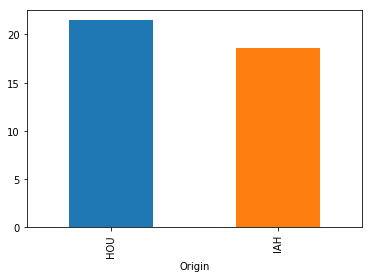

In [17]:
mean_depdelay = depdelonly.groupby(['Origin']).mean()['DepDelay'] #gets the mean of departure delay grouped by airport
bardepdelay = mean_depdelay.plot.bar() #plots a bar chart of the mean dep delay for the two airports
bardepdelay;

**Result:**
Based on the bar chart above, HOU airport has a higher average departure delay time (in minutes) as compared with IAH. This means that HOU performed worse than IAH in this particular metric.

### Problem 2: ###
The following processes were undertaken to answer the problem above:
1. Create a new column to the flights dataset (flights1) to calculate average taxi time. The average taxi time was calculated as Taxi In (in minutes) + Taxi Out (in minutes) divided by 2.
2. Descriptive statistics for the average taxi time was performed grouped by airports (to be able to compare the two airports' summary statistics in terms of this column).
3. Created a subset of the flights1 data to filter it for only those aircrafts whose average taxi time is greater than 12. The number was based on some research made by the team. Based on this link: [link] [https://www.planestats.com/aptot_2016mar], the average is 12 minutes. Therefore, an aircraft that has average of more than 12 minutes is considered not good.
3. Performed a count of the number of aircrafts that has greater than 12 minutes average taxi time grouped by airport. Afterwhich, the percentage of aircrafts with greater than 12 minutes average taxi time was calculated per airport.
4. Using the percentage of aircrafts with greater than 12 minutes average taxi time per aiprort, a bar chart was plotted to visually compare the performance of the two airports. Percentage was calculated since there is a significant difference of the number of flights that departed for between the two airports.

In [19]:
flights1 = flights.copy() #creates a copy of the flights data and stores it as flights1
flights1.head() #prints a sample of this copied data frame

,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,60.0,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,60.0,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,70.0,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,70.0,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,62.0,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [20]:
flights1['Avg_Taxi_Time'] = (flights1['TaxiIn'] + flights1['TaxiOut'])/2 #creates new column for average taxi time
flights1.loc[:,['Origin','Avg_Taxi_Time']] #prints all rows but only Origin and Avg_Taxi_Time columns

,Origin,Avg_Taxi_Time
0,IAH,10.0
1,IAH,7.5
2,IAH,11.0
3,IAH,15.5
4,IAH,9.0
5,IAH,9.5
6,IAH,13.5
7,IAH,9.5
8,IAH,15.0
9,IAH,12.5


In [22]:
Avg_Taxi_Time_IAH = flights1[flights1['Origin']=='IAH'] #filters IAH airport only
Avg_Taxi_Time_HOU = flights1[flights1['Origin']=='HOU'] #filters HOU airport only

#prints descriptive stats for IAH
print('IAH Descriptive Stats (Avg_Taxi_Time): ')
print(Avg_Taxi_Time_IAH['Avg_Taxi_Time'].describe())

IAH Descriptive Stats (Avg_Taxi_Time): 
count    15516.000000
mean        11.539927
std          4.108334
min          4.000000
25%          9.000000
50%         10.500000
75%         13.500000
max         88.000000
Name: Avg_Taxi_Time, dtype: float64


The descriptive statistics for the average taxi time in minutes for the IAH airport is 11.54 which is still below the benchmark of 12 minutes taxi time while median is 10.50. Since the mean is almost equal to the median this shows that the data is close to being normally distributed.

In [56]:
#prints descriptive stats for HOU
print('HOU Descriptive Stats (Avg_Taxi_Time): ')
print(Avg_Taxi_Time_HOU['Avg_Taxi_Time'].describe())

HOU Descriptive Stats (Avg_Taxi_Time): 
count    4250.000000
mean        7.194824
std         2.714538
min         3.000000
25%         5.500000
50%         6.500000
75%         8.000000
max        37.000000
Name: Avg_Taxi_Time, dtype: float64


The descriptive statistics for the average taxi time in minutes for the HOU airport is 7.19 which is still below the benchmark of 12 minutes taxi time while median is 6.50. Since the mean is almost equal to the median this shows that the data is close to being normally distributed.

In [34]:
taxi12 = flights1[flights1['Avg_Taxi_Time']>12] #creates subset of flights with Avg Taxi Time greater than 12
taxi12.loc[:,['Origin','Avg_Taxi_Time']]

,Origin,Avg_Taxi_Time
3,IAH,15.5
6,IAH,13.5
8,IAH,15.0
9,IAH,12.5
10,IAH,14.0
15,IAH,14.5
19,IAH,16.5
22,IAH,12.5
23,IAH,17.0
30,IAH,16.5


In [36]:
count_taxi12 = taxi12.groupby(['Origin']).count()['Avg_Taxi_Time'] #counts Avg Taxi Time more than 12 by airport
print(count_taxi12)

Origin
HOU     196
IAH    5161
Name: Avg_Taxi_Time, dtype: int64


In [39]:
airports = flights.groupby(['Origin'])
count_airport = airports['Origin'].count() #gets number of total flights per airport
print(count_airport)

Origin
HOU     4319
IAH    15681
Name: Origin, dtype: int64


In [40]:
pct_avg_taxi_time = (count_taxi12/count_airport)*100 #calculates percentage of avg taxi time more than 12 by airport
print(pct_avg_taxi_time)

Origin
HOU     4.538088
IAH    32.912442
dtype: float64


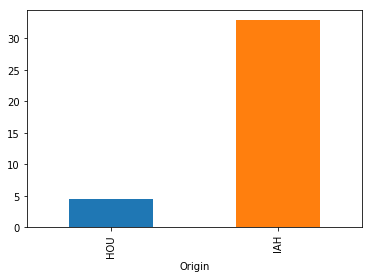

In [41]:
barpct_taxi_time = pct_avg_taxi_time.plot.bar() #plots a bar chart of the pct avg taxi time for the two airports
barpct_taxi_time;

**Result:**

Based on the bar chart above, IAH airport has a higher percentage of average taxi time as compared with HOU. This means that IAH performed worse than HOU in this particular metric.

### Problem 3: ###
The following processes were undertaken to answer the problem above:
1. Based on problem 1 results, HOU performed worse than IAH for the average gate departure delay. To dig dipper, the team looked into which particular carrier/s is more likely causing this issue. To be able to do so, the team created a subset of the data that only has flights in HOU then, a bar chart of the average gate departure delay by Unique Carrier was plotted.
2. Based on problem 2 results, IAH performed worse than HOU for the average taxi time. To dig dipper, the team looked into which particular carrier/s is more likely causing this issue. To be able to do so, the team created a subset of the data that only has flights in HOU then, a bar chart of the percentage of the by Unique Carrier that had more than 12 minutes of average taxi time was plotted.

### HOU Average Departure Delay by Unique Carrier: ###

In [43]:
depdelonlyHOU_UC = depdelonlyHOU.groupby(['UniqueCarrier']) #average departure delay in HOU airport only grouped by carrier
mean_depdelayHOU_UC = depdelonlyHOU_UC['DepDelay'].describe()['mean'] #calculates mean departure delay in HOU airport by carrier
print(mean_depdelayHOU_UC)

UniqueCarrier
B6    47.700000
DL    24.740741
EV    21.333333
F9    27.047619
FL    21.547619
MQ    26.734375
WN    20.873374
Name: mean, dtype: float64


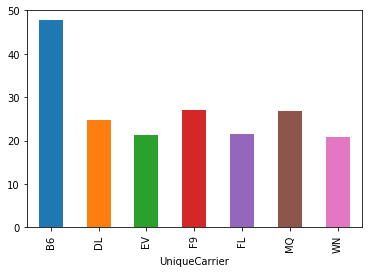

In [44]:
bardepdelayHOU_UC = mean_depdelayHOU_UC.plot.bar()
bardepdelayHOU_UC;

Based on this chart, it shows that B6 or Jet Blue Airways has the worst average departure delay time (in minutes) by carrier for the HOU airport.

### IAH AverageTaxi Time by Unique Carrier: ###

In [48]:
avgtaxitimeIAH = taxi12[taxi12['Origin']=='IAH'] #filters IAH airports only
avgtaxitimeIAH_UC = avgtaxitimeIAH.groupby(['UniqueCarrier']).count()['Avg_Taxi_Time'] #gets count of avg taxi time more than 12 by unique carrier
print(avgtaxitimeIAH_UC)

UniqueCarrier
AA     191
AS      17
CO    3072
DL      95
EV      33
MQ      60
OO     266
UA      36
US     102
XE    1289
Name: Avg_Taxi_Time, dtype: int64


In [53]:
IAH = Avg_Taxi_Time_IAH.groupby(['UniqueCarrier'])
countIAH_UC = IAH.count()['Avg_Taxi_Time'] #gets number of total flights by Unique Carrier for IAH
print(countIAH_UC)

UniqueCarrier
AA     505
AS      59
CO    6777
DL     160
EV      85
MQ     123
OO     690
UA      98
US     297
XE    6722
Name: Avg_Taxi_Time, dtype: int64


In [54]:
pct_avg_taxi_time_IAH_UC = (avgtaxitimeIAH_UC/countIAH_UC)*100 #calculates percentage of avg taxi time more than 12 by airport
print(pct_avg_taxi_time_IAH_UC)

UniqueCarrier
AA    37.821782
AS    28.813559
CO    45.329792
DL    59.375000
EV    38.823529
MQ    48.780488
OO    38.550725
UA    36.734694
US    34.343434
XE    19.175841
Name: Avg_Taxi_Time, dtype: float64


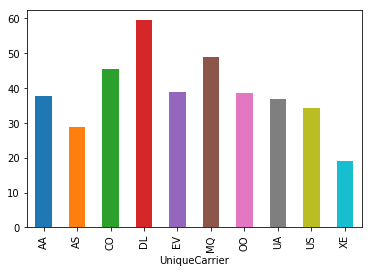

In [55]:
barpct_taxi_time_IAH_UC = pct_avg_taxi_time_IAH_UC.plot.bar() #plots a bar chart of the avg taxi time for IAH by Unique Carrier
barpct_taxi_time_IAH_UC;

Based on this chart, it shows that DL or Delta airlines has the worst average taxi time (in minutes) by carrier for the IAH airport.

## Conclusion: ##

First of all, all of our questions are focused on customer service aspect. We analyzed "Customer Service" by figuring out the drivers for each attributes. For "Delay" dimension, airline operational issues are the main factors to increase or decrease the time of delay. For "Taxi" dimension, traffic system is the main factor to increase or decrease the delay. 

Secondly, we broke down each dimension into more details. For "Delay" dimension, we analyzed the data to figure out which airport has the worst performance(IAH or HOU?). We found out "HOU" had the worst performance, so we dig more into the "HOU" airport to find out which specific airline caused the issue. After analyzing the bar chart mean departure delay for each airline, we concluded that "B6"(Jet Blue) has the worst performance, which has an average 48 minutes delay time compared to others around 20 minutes. Therefore, we recommend HOU airport to discuss the issues with Jet Blue management team to improve their opeartional management by cutting off delay time in the future.  

Thirdly, For "Taxi" dimension, we did the same process to figure out which airport has the worst performance(IAH or HOU?). We found out "IAH" had the worst performance, so we dig more into the "IAH" airport to find out which specific airline caused the issue. Also, we did some research to get the average taxi benchmark "12", then analyzed the data to find out the percentage of each airline which has taxi time over 12 minutes. After analyzing the percentage of bar chart for each airlines, we concluded that "DL"(Delta Airlines) has the worst performance(Average Taxi Time > 12 -59%, Average Taxi Time <= 12 - 41%). Therefore, we recommend IAH airport to discuss the issues with Delta Airlines management team to improve their traffic system by idenfying any potentional problems. 